In [6]:
import json
import re
from collections import Counter, defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline


In [7]:
with open('C:/Users/LAKSHYA PALIWAL/CoreNet/data/analysis-with-code.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

nodes = data['analysisData']['graphNodes']
print(f"Total nodes: {len(nodes)}")

# Parse ID structure
def parse_id(node_id):
    parts = node_id.split(':')
    if len(parts) >= 3:
        filepath = parts[1]
        return {
            'filepath': filepath,
            'filename': filepath.split('/')[-1],
            'directory': '/'.join(filepath.split('/')[:-1]) if '/' in filepath else '',
        }
    return {}

for node in nodes:
    node.update(parse_id(node['id']))

df = pd.DataFrame(nodes)


Total nodes: 291


In [8]:
df.head()

,id,label,code,type,filepath,filename,directory
0,code:fastapi/applications.py:FastAPI:50,FastAPI,"\nclass FastAPI(Starlette):\n """"""\n `Fas...",Class,fastapi/applications.py,applications.py,fastapi
1,code:fastapi/applications.py:__call__:1129,__call__,"\nasync def __call__(self, scope: Scope, recei...",Method,fastapi/applications.py,applications.py,fastapi
2,code:fastapi/applications.py:__init__:66,__init__,"\ndef __init__(\n self: AppType,\n *,\n ...",Method,fastapi/applications.py,applications.py,fastapi
3,code:fastapi/applications.py:add_api_route:1134,add_api_route,"\ndef add_api_route(\n self,\n path: str...",Method,fastapi/applications.py,applications.py,fastapi
4,code:fastapi/applications.py:add_api_websocket...,add_api_websocket_route,"\ndef add_api_websocket_route(\n self,\n ...",Method,fastapi/applications.py,applications.py,fastapi


In [9]:
df.shape

(291, 7)

## 1. Type Distribution


In [10]:
type_counts = df['type'].value_counts()
df['type'].nunique()


6

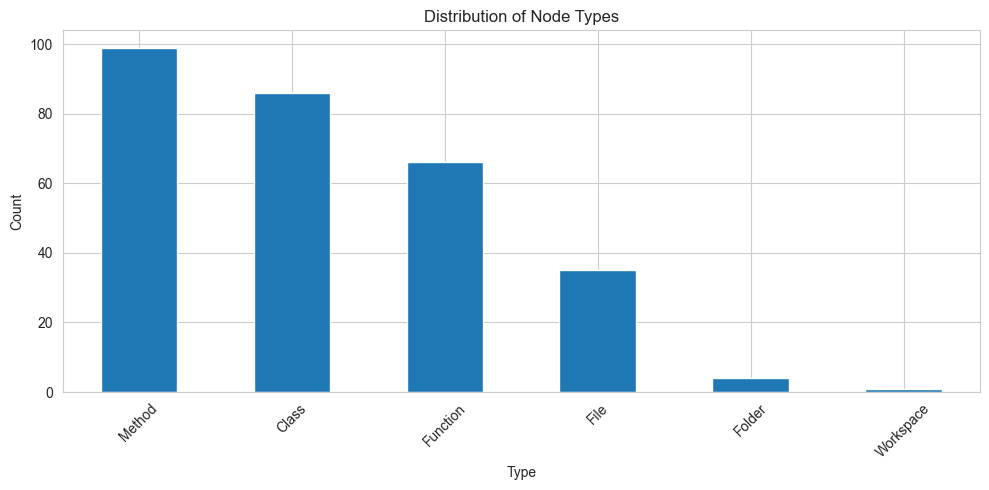

In [11]:
plt.figure(figsize=(10, 5))
type_counts.plot(kind='bar')
plt.title('Distribution of Node Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:

df['label'].value_counts().head(30)


label
__init__                   34
__call__                   13
decorator                  10
app                         6
openapi                     3
utils.py                    3
__init__.py                 3
__repr__                    3
Header                      3
include_router              2
api_route                   2
delete                      2
get                         2
websocket_route             2
websocket                   2
put                         2
options                     2
patch                       2
post                        2
trace                       2
add_api_route               2
HTTPBase                    2
Config                      2
HTTPBearer                  2
File                        2
head                        2
on_event                    2
middleware                  2
add_api_websocket_route     2
Body                        2
Name: count, dtype: int64

In [14]:

# Dunder methods
dunder = df[df['label'].str.match(r'^__.*__$', na=False)]
dunder['label'].value_counts().head(10)

label
__init__                        34
__call__                        13
__repr__                         3
__str__                          1
__get_pydantic_core_schema__     1
__get_pydantic_json_schema__     1
__get_validators__               1
Name: count, dtype: int64

In [15]:
# Private methods
private = df[df['label'].str.match(r'^_[^_].*', na=False)]
private['label'].value_counts().head(10)

label
_validate                            1
_get_openapi_operation_parameters    1
_merge_lifespan_context              1
_prepare_response_content            1
Name: count, dtype: int64

In [16]:
# HTTP verbs (CORE indicators)
http_verbs = ['get', 'post', 'put', 'patch', 'delete', 'options', 'head', 'trace']
http_matches = df[df['label'].isin(http_verbs)]
http_matches['label'].value_counts()

label
delete     2
get        2
head       2
options    2
patch      2
post       2
put        2
trace      2
Name: count, dtype: int64

In [17]:


patterns = {
    'get_*': r'^get_',
    'set_*': r'^set_',
    'is_*': r'^is_',
    'has_*': r'^has_',
    'to_*': r'^to_',
    'from_*': r'^from_',
    '*_handler': r'.*_handler$',
    '*_encoder': r'.*_encoder$',
    '*_decoder': r'.*_decoder$',
    '*_parser': r'.*_parser$',
    '*_validator': r'.*_validator$',
    'format_*': r'^format_',
    'parse_*': r'^parse_',
    'validate_*': r'^validate_',
    'generate_*': r'^generate_',
}

for pattern_name, regex in patterns.items():
    matches = df[df['label'].str.match(regex, case=False, na=False)]
    if len(matches) > 0:
        print(f"\n{pattern_name}: {len(matches)} functions")
        if len(matches) <= 5:
            print(matches['label'].tolist())
        else:
            print(matches['label'].value_counts().head(5))



get_*: 15 functions
label
get_redoc_html                         1
get_swagger_ui_html                    1
get_swagger_ui_oauth2_redirect_html    1
get_fields_from_routes                 1
get_openapi                            1
Name: count, dtype: int64

is_*: 1 functions
['is_body_allowed_for_status_code']

*_handler: 6 functions
label
exception_handler                                 1
http_exception_handler                            1
request_validation_exception_handler              1
websocket_request_validation_exception_handler    1
get_request_handler                               1
Name: count, dtype: int64

*_encoder: 2 functions
['decimal_encoder', 'jsonable_encoder']

generate_*: 5 functions
['generate_encoders_by_class_tuples', 'generate_operation_id', 'generate_operation_summary', 'generate_operation_id_for_path', 'generate_unique_id']


## 5. File Path Patterns


In [18]:

print("\nTop 20 Files by Function Count:")
print(df['filename'].value_counts().head(20))

print("\nTop 15 Directories:")
print(df['directory'].value_counts().head(15))



Top 20 Files by Function Count:
filename
models.py                 48
routing.py                45
applications.py           32
params.py                 24
utils.py                  18
oauth2.py                 15
http.py                   14
exceptions.py             14
api_key.py                11
param_functions.py         9
responses.py               4
encoders.py                4
exception_handlers.py      3
docs.py                    3
asyncexitstack.py          3
open_id_connect_url.py     3
base.py                    1
Name: count, dtype: int64

Top 15 Directories:
directory
fastapi               143
fastapi/openapi        60
fastapi/security       45
fastapi/middleware      3
Name: count, dtype: int64


## 6. Exception/Error Classes


In [20]:
exceptions = df[df['label'].str.contains('Exception|Error', case=False, na=False)]
print(f"Exception/Error classes: {len(exceptions)}")
print("\nAll exception/error labels:")
print(exceptions[['label', 'type', 'filename']].to_string())


Exception/Error classes: 14

All exception/error labels:
                                              label      type               filename
13                                exception_handler    Method        applications.py
36                           http_exception_handler  Function  exception_handlers.py
37             request_validation_exception_handler  Function  exception_handlers.py
38   websocket_request_validation_exception_handler  Function  exception_handlers.py
39                                     FastAPIError     Class          exceptions.py
40                                    HTTPException     Class          exceptions.py
41                           RequestValidationError     Class          exceptions.py
42                          ResponseValidationError     Class          exceptions.py
43                              ValidationException     Class          exceptions.py
44                               WebSocketException     Class          exceptions.py
45      

## 7. Build Preliminary Scoring Heuristic


In [21]:
def score_by_patterns(row):
    """Preliminary scoring: 0=utility, 1=core"""
    score = 0.5  # neutral
    label = row['label']
    node_type = row['type']
    filepath = str(row.get('filepath', ''))
    
    # Path-based (-0.3 for utility paths, +0.3 for core paths)
    if any(x in filepath for x in ['utils/', 'encoders.py', 'exceptions.py', 'models.py', 'openapi/models']):
        score -= 0.3
    if any(x in filepath for x in ['applications.py', 'routing/', 'dependencies/', 'security/']):
        score += 0.3
    
    # HTTP verbs = CORE
    if label in ['get', 'post', 'put', 'patch', 'delete', 'options', 'head', 'trace']:
        score += 0.4
    
    # Utility name patterns
    if re.match(r'^(get|set|to|from|format|parse)_', label):
        score -= 0.3
    if label.endswith(('_handler', '_encoder', '_decoder', '_parser', '_validator')):
        score -= 0.3
    if label.endswith(('Exception', 'Error')):
        score -= 0.2
    if re.match(r'^__.*__$', label):
        score -= 0.1
    if label == 'decorator':
        score -= 0.2
    
    # Type-based
    if node_type == 'Class' and label.endswith(('Exception', 'Error', 'Model', 'Schema')):
        score -= 0.2
    
    return max(0, min(1, score))

df['heuristic_score'] = df.apply(score_by_patterns, axis=1)
print("Score Distribution:")
print(df['heuristic_score'].describe())


Score Distribution:
count    291.000000
mean       0.474570
std        0.247552
min        0.000000
25%        0.200000
50%        0.500000
75%        0.700000
max        1.000000
Name: heuristic_score, dtype: float64


In [22]:
print("=" * 80)
print("TOP 20 'CORE' FUNCTIONS (highest scores)")
print("=" * 80)
top_core = df.nlargest(20, 'heuristic_score')[['label', 'type', 'filename', 'heuristic_score']]
print(top_core.to_string())

print("\n" + "=" * 80)
print("TOP 20 'UTILITY' FUNCTIONS (lowest scores)")
print("=" * 80)
top_util = df.nsmallest(20, 'heuristic_score')[['label', 'type', 'filename', 'heuristic_score']]
print(top_util.to_string())


TOP 20 'CORE' FUNCTIONS (highest scores)
                       label    type         filename  heuristic_score
12                    delete  Method  applications.py              1.0
14                       get  Method  applications.py              1.0
15                      head  Method  applications.py              1.0
21                   options  Method  applications.py              1.0
22                     patch  Method  applications.py              1.0
23                      post  Method  applications.py              1.0
24                       put  Method  applications.py              1.0
29                     trace  Method  applications.py              1.0
175                   delete  Method       routing.py              0.9
176                      get  Method       routing.py              0.9
180                     head  Method       routing.py              0.9
186                  options  Method       routing.py              0.9
187                    patch  Method

## 9. Visualization


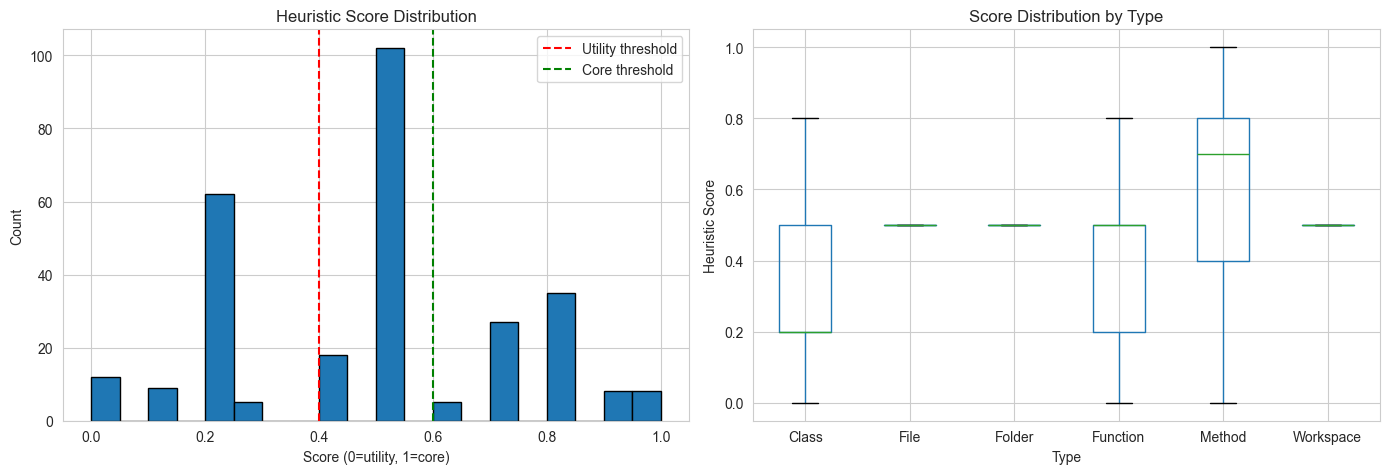

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Score histogram
axes[0].hist(df['heuristic_score'], bins=20, edgecolor='black')
axes[0].set_title('Heuristic Score Distribution')
axes[0].set_xlabel('Score (0=utility, 1=core)')
axes[0].set_ylabel('Count')
axes[0].axvline(0.4, color='red', linestyle='--', label='Utility threshold')
axes[0].axvline(0.6, color='green', linestyle='--', label='Core threshold')
axes[0].legend()

# Score by type
df.boxplot(column='heuristic_score', by='type', ax=axes[1])
axes[1].set_title('Score Distribution by Type')
axes[1].set_xlabel('Type')
axes[1].set_ylabel('Heuristic Score')
plt.suptitle('')

plt.tight_layout()
plt.show()


## 10. Final Summary
